**Q1. What is the KNN algorithm?**

**ANSWER:----------**



The K-Nearest Neighbors (KNN) algorithm is a simple, yet powerful, supervised machine learning algorithm that can be used for both classification and regression tasks. Here’s an overview of how it works:

### Key Concepts

1. **Instance-based Learning**: KNN is an instance-based learning algorithm, meaning it does not make any assumptions about the underlying data distribution. Instead, it memorizes the training dataset and makes predictions based on the similarity between new data points and the training instances.

2. **Distance Metric**: KNN relies on a distance metric to find the "nearest neighbors" to a given query point. Commonly used distance metrics include:
   - **Euclidean Distance**: Most commonly used, especially for continuous variables.
   - **Manhattan Distance**: Useful when the data is on a grid-like pattern.
   - **Minkowski Distance**: Generalization of both Euclidean and Manhattan distances.
   - **Hamming Distance**: Used for categorical variables.

3. **Parameter \( k \)**: The number of nearest neighbors to consider when making a prediction. Choosing the right value for \( k \) is crucial; a smaller \( k \) makes the algorithm sensitive to noise, while a larger \( k \) can smooth out predictions but may ignore smaller patterns.

### How KNN Works

#### For Classification:
1. **Compute Distances**: Calculate the distance between the query point and all the points in the training set.
2. **Find Neighbors**: Identify the \( k \) training instances that are closest to the query point.
3. **Majority Vote**: Assign the class label that is most frequent among the \( k \) nearest neighbors.

#### For Regression:
1. **Compute Distances**: Calculate the distance between the query point and all the points in the training set.
2. **Find Neighbors**: Identify the \( k \) training instances that are closest to the query point.
3. **Average Value**: Predict the output value as the average of the values of the \( k \) nearest neighbors.

### Pros and Cons

**Pros:**
- **Simple and Intuitive**: Easy to understand and implement.
- **No Training Phase**: Since it is an instance-based learner, there is no explicit training phase.
- **Non-parametric**: Makes no assumptions about the data distribution, making it versatile.

**Cons:**
- **Computationally Intensive**: Finding the nearest neighbors requires computing distances to all points in the training set, which can be slow for large datasets.
- **Storage Requirements**: Needs to store all training data, which can be memory-intensive.
- **Sensitive to Irrelevant Features**: Performance can degrade if the data has many irrelevant features, hence feature selection or scaling is often required.

### Use Cases

- **Classification**: Handwritten digit recognition, spam detection, image classification.
- **Regression**: Predicting housing prices, stock price prediction, temperature forecasting.

### Example
Let's say we have a dataset with two classes, red circles and blue squares, and we want to classify a new point (query point) using KNN with \( k = 3 \). We find the three nearest neighbors and see that two of them are red circles and one is a blue square. Using majority voting, we classify the query point as a red circle.

### Conclusion

KNN is a foundational algorithm in machine learning that is often used as a benchmark due to its simplicity and effectiveness, particularly for smaller datasets and when interpretability is important.

**Q2. How do you choose the value of K in KNN?**

**ANSWER:----------**



Choosing the optimal value of \( k \) in the K-Nearest Neighbors (KNN) algorithm is crucial for its performance. The value of \( k \) determines how many neighbors are considered when making a prediction. Here are some methods and considerations to help choose the right \( k \):

### Methods to Choose \( k \)

1. **Cross-Validation**:
   - **k-Fold Cross-Validation**: Split the training data into \( k \) folds and perform cross-validation to evaluate the performance of different \( k \) values. The \( k \) value with the best performance (e.g., highest accuracy or lowest error) is chosen.
   - **Leave-One-Out Cross-Validation (LOOCV)**: A special case of k-fold cross-validation where \( k \) is equal to the number of data points. Each data point is used once as a test set while the remaining points form the training set. This method is computationally intensive but gives a thorough evaluation.

2. **Elbow Method**:
   - Plot the error rate for different values of \( k \). The goal is to find the "elbow point" where the error starts to level off. This point typically indicates a good balance between bias and variance.

3. **Grid Search with Cross-Validation**:
   - Use grid search to systematically try a range of \( k \) values combined with cross-validation to find the optimal \( k \). This method automates the search process and is commonly used in machine learning pipelines.

### Considerations for Choosing \( k \)

1. **Small \( k \) (e.g., 1 or 3)**:
   - Pros: Captures fine details, can model complex patterns.
   - Cons: Sensitive to noise and outliers, may overfit the data.

2. **Large \( k \) (e.g., 15 or 20)**:
   - Pros: Smoother decision boundaries, less sensitive to noise.
   - Cons: May overlook smaller patterns, can underfit the data.

3. **Odd vs. Even \( k \)**:
   - It's often beneficial to choose an odd value for \( k \) in binary classification problems to avoid ties.

4. **Domain Knowledge**:
   - Sometimes, domain-specific knowledge can guide the selection of \( k \). For instance, in some applications, there might be a natural number of neighbors to consider.

5. **Size of the Dataset**:
   - For small datasets, a smaller \( k \) might be preferable to capture enough detail.
   - For larger datasets, a larger \( k \) can provide more robust predictions by averaging out noise.

### Practical Steps to Choose \( k \)

1. **Start with a Range of Values**:
   - Begin by considering a range of \( k \) values, such as from 1 to 20.

2. **Evaluate Performance**:
   - Use cross-validation to evaluate the performance of each \( k \) value. Metrics to consider include accuracy, precision, recall, F1-score for classification, and mean squared error (MSE) for regression.

3. **Plot the Results**:
   - Plot the evaluation metric (e.g., accuracy or error rate) against the \( k \) values. Look for the elbow point or the value where the metric starts to stabilize.

4. **Choose the Best \( k \)**:
   - Select the \( k \) value that provides the best performance based on cross-validation results and the elbow method.

5. **Test and Validate**:
   - Once you choose the optimal \( k \), test the KNN model on a separate validation or test set to confirm its performance.



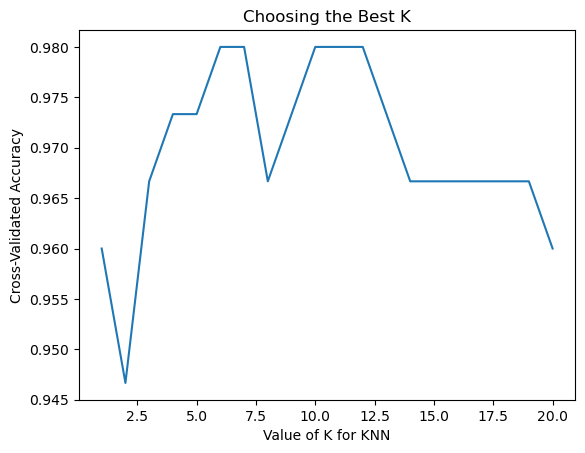

The best value of k is: 6


In [3]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Load the Iris dataset
data = load_iris()
X, y = data.data, data.target

# Range of k values to try
k_values = range(1, 21)
scores = []

# Perform cross-validation for each k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=5, scoring='accuracy').mean()
    scores.append(score)

# Plot the results
plt.plot(k_values, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Choosing the Best K')
plt.show()

# Choose the best k
best_k = k_values[scores.index(max(scores))]
print(f'The best value of k is: {best_k}')


**Q3. What is the difference between KNN classifier and KNN regressor?**

**ANSWER:----------**



The K-Nearest Neighbors (KNN) algorithm can be used for both classification and regression tasks, but the approach and the output differ between the two. Here's a detailed comparison between the KNN classifier and the KNN regressor:

### KNN Classifier

1. **Purpose**:
   - The KNN classifier is used for classification tasks where the goal is to assign a discrete class label to a given data point.

2. **Output**:
   - The output is a class label. For example, it could classify an email as "spam" or "not spam."

3. **Decision Rule**:
   - The class label of a data point is determined by the majority vote of its \( k \) nearest neighbors. The data point is assigned to the class that is most common among its \( k \) nearest neighbors.

4. **Distance Metric**:
   - Common distance metrics include Euclidean distance, Manhattan distance, and Minkowski distance, used to measure the similarity between data points.

5. **Example**:
   - Given a dataset of labeled points (e.g., types of flowers), the KNN classifier can classify a new flower based on the most common type among its \( k \) nearest neighbors.

### KNN Regressor

1. **Purpose**:
   - The KNN regressor is used for regression tasks where the goal is to predict a continuous value for a given data point.

2. **Output**:
   - The output is a continuous value. For example, it could predict the price of a house based on its features.

3. **Decision Rule**:
   - The predicted value for a data point is the average (or sometimes the weighted average) of the values of its \( k \) nearest neighbors.

4. **Distance Metric**:
   - The same distance metrics as the classifier can be used, including Euclidean distance, Manhattan distance, and Minkowski distance.

5. **Example**:
   - Given a dataset of houses with known prices, the KNN regressor can predict the price of a new house based on the average price of the \( k \) nearest houses in the dataset.

### Key Differences

1. **Output Type**:
   - **Classifier**: Outputs a class label (categorical).
   - **Regressor**: Outputs a continuous value (numerical).

2. **Decision Rule**:
   - **Classifier**: Uses majority voting among the \( k \) nearest neighbors to determine the class label.
   - **Regressor**: Uses the average value of the \( k \) nearest neighbors to predict the output value.

3. **Use Cases**:
   - **Classifier**: Suitable for tasks like image classification, spam detection, and disease diagnosis.
   - **Regressor**: Suitable for tasks like predicting house prices, stock prices, and temperature forecasting.



In [4]:
from sklearn.datasets import load_iris, make_regression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error

# KNN Classifier example with Iris dataset
iris = load_iris()
X_iris, y_iris = iris.data, iris.target
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_iris, y_iris, test_size=0.3, random_state=42)

knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train_iris, y_train_iris)
y_pred_iris = knn_classifier.predict(X_test_iris)

print(f'KNN Classifier Accuracy: {accuracy_score(y_test_iris, y_pred_iris)}')

# KNN Regressor example with synthetic regression dataset
X_reg, y_reg = make_regression(n_samples=100, n_features=1, noise=0.1)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)

knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train_reg, y_train_reg)
y_pred_reg = knn_regressor.predict(X_test_reg)

print(f'KNN Regressor Mean Squared Error: {mean_squared_error(y_test_reg, y_pred_reg)}')


KNN Classifier Accuracy: 1.0
KNN Regressor Mean Squared Error: 146.50581866444995


**Q4. How do you measure the performance of KNN?**

**ANSWER:----------**



Measuring the performance of the K-Nearest Neighbors (KNN) algorithm depends on whether it is being used for classification or regression tasks. Here’s a detailed overview of the performance metrics used for each:

### Performance Metrics for KNN Classifier

1. **Accuracy**:
   - **Definition**: The ratio of correctly predicted instances to the total instances.
   - **Formula**: \(\text{Accuracy} = \frac{\text{Number of Correct Predictions}}{\text{Total Number of Predictions}}\)
   - **Usage**: Useful when the classes are balanced.

2. **Confusion Matrix**:
   - **Definition**: A table used to describe the performance of a classification model on a set of test data for which the true values are known.
   - **Components**: True Positive (TP), True Negative (TN), False Positive (FP), and False Negative (FN).
   - **Usage**: Provides insight into the types of errors the classifier is making.

3. **Precision, Recall, and F1-Score**:
   - **Precision**: The ratio of correctly predicted positive observations to the total predicted positives.
     \[
     \text{Precision} = \frac{TP}{TP + FP}
     \]
   - **Recall**: The ratio of correctly predicted positive observations to all observations in the actual class.
     \[
     \text{Recall} = \frac{TP}{TP + FN}
     \]
   - **F1-Score**: The harmonic mean of precision and recall.
     \[
     \text{F1-Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
     \]
   - **Usage**: Useful for imbalanced datasets where accuracy can be misleading.

4. **ROC Curve and AUC**:
   - **ROC Curve**: A graphical representation of the diagnostic ability of a binary classifier, plotting True Positive Rate (TPR) against False Positive Rate (FPR).
   - **AUC (Area Under the Curve)**: Measures the entire two-dimensional area underneath the ROC curve.
   - **Usage**: Useful for evaluating the performance across different threshold values.

### Performance Metrics for KNN Regressor

1. **Mean Squared Error (MSE)**:
   - **Definition**: The average of the squared differences between the predicted and actual values.
   - **Formula**: \(\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2\)
   - **Usage**: Penalizes larger errors more heavily, making it sensitive to outliers.

2. **Root Mean Squared Error (RMSE)**:
   - **Definition**: The square root of the mean squared error.
   - **Formula**: \(\text{RMSE} = \sqrt{\text{MSE}}\)
   - **Usage**: Provides an error metric in the same units as the target variable.

3. **Mean Absolute Error (MAE)**:
   - **Definition**: The average of the absolute differences between the predicted and actual values.
   - **Formula**: \(\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|\)
   - **Usage**: Less sensitive to outliers compared to MSE.

4. **R-squared (Coefficient of Determination)**:
   - **Definition**: The proportion of the variance in the dependent variable that is predictable from the independent variables.
   - **Formula**: \(R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}\)
   - **Usage**: Indicates how well the model explains the variability of the target variable.



In [5]:
from sklearn.datasets import load_iris, make_regression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# KNN Classifier example with Iris dataset
iris = load_iris()
X_iris, y_iris = iris.data, iris.target
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_iris, y_iris, test_size=0.3, random_state=42)

knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train_iris, y_train_iris)
y_pred_iris = knn_classifier.predict(X_test_iris)

print(f'KNN Classifier Accuracy: {accuracy_score(y_test_iris, y_pred_iris)}')
print('Confusion Matrix:\n', confusion_matrix(y_test_iris, y_pred_iris))
print('Classification Report:\n', classification_report(y_test_iris, y_pred_iris))

# KNN Regressor example with synthetic regression dataset
X_reg, y_reg = make_regression(n_samples=100, n_features=1, noise=0.1)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)

knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train_reg, y_train_reg)
y_pred_reg = knn_regressor.predict(X_test_reg)

print(f'KNN Regressor MSE: {mean_squared_error(y_test_reg, y_pred_reg)}')
print(f'KNN Regressor RMSE: {np.sqrt(mean_squared_error(y_test_reg, y_pred_reg))}')
print(f'KNN Regressor MAE: {mean_absolute_error(y_test_reg, y_pred_reg)}')
print(f'KNN Regressor R^2: {r2_score(y_test_reg, y_pred_reg)}')


KNN Classifier Accuracy: 1.0
Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

KNN Regressor MSE: 87.27821302599256
KNN Regressor RMSE: 9.342280932726897
KNN Regressor MAE: 4.671551346549925
KNN Regressor R^2: 0.9833602857063722


**Q5. What is the curse of dimensionality in KNN?**

**ANSWER:----------**



The "curse of dimensionality" refers to the various phenomena that arise when analyzing and organizing data in high-dimensional spaces that do not occur in low-dimensional settings. In the context of the K-Nearest Neighbors (KNN) algorithm, the curse of dimensionality can significantly impact its performance and effectiveness. Here's a detailed explanation:

### Curse of Dimensionality in KNN

1. **Distance Metrics Become Less Informative**:
   - In high-dimensional spaces, the distance between any two points tends to become similar. This is because the volume of the space increases exponentially with the number of dimensions, leading to a situation where points are almost equidistant from each other.
   - As a result, the notion of "nearness" becomes less meaningful, making it difficult for the KNN algorithm to identify the true nearest neighbors.

2. **Sparsity of Data**:
   - High-dimensional spaces are mostly empty because the number of possible data points grows exponentially with the number of dimensions.
   - This sparsity means that data points are far apart from each other, making it challenging for the KNN algorithm to find sufficiently close neighbors to make reliable predictions.

3. **Increased Computational Complexity**:
   - The computational cost of calculating distances between data points increases with the number of dimensions.
   - As the dimensionality increases, the KNN algorithm requires more time and resources to compute the distances and identify the nearest neighbors.

4. **Overfitting**:
   - With high-dimensional data, KNN can easily overfit the training data because it tries to capture the noise present in the data rather than the underlying patterns.
   - Overfitting results in poor generalization to new, unseen data.

### Mitigating the Curse of Dimensionality

1. **Dimensionality Reduction**:
   - **Principal Component Analysis (PCA)**: Reduces the dimensionality by projecting the data onto the principal components that capture the most variance.
   - **Linear Discriminant Analysis (LDA)**: Finds a linear combination of features that best separates the classes.
   - **t-SNE, UMAP**: Non-linear techniques for dimensionality reduction that preserve the local structure of the data.

2. **Feature Selection**:
   - Identify and retain only the most relevant features that contribute significantly to the prediction task. Methods include mutual information, chi-square test, and recursive feature elimination.

3. **Normalization and Scaling**:
   - Normalize or standardize the features to ensure that all dimensions contribute equally to the distance computation. This can help mitigate the effect of features with larger ranges dominating the distance metric.

4. **Use of Distance Metrics Suitable for High Dimensions**:
   - Consider using distance metrics that are less affected by high dimensionality, such as cosine similarity or Mahalanobis distance, which take into account the correlation between features.


### Explanation of the Code:

1. **Data Generation**:
   - `generate_data`: Generates synthetic data with a specified number of features (dimensions).
   - `evaluate_knn`: Evaluates the KNN classifier's performance using accuracy as the metric.

2. **Evaluate KNN Performance**:
   - The code evaluates the performance of KNN on datasets with varying numbers of dimensions. It demonstrates how the accuracy changes as the dimensionality increases.

3. **Dimensionality Reduction with PCA**:
   - The code applies PCA to reduce a high-dimensional dataset to 10 components and then evaluates the KNN performance on the reduced dataset.

This example illustrates how increasing dimensionality can impact the performance of KNN and shows how dimensionality reduction techniques like PCA can be used to mitigate the curse of dimensionality.

In [9]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

# Function to generate synthetic data with increasing dimensions
def generate_data(n_samples=1000, n_features=10):
    # Ensure the number of informative features meets the condition
    n_informative = min(5, n_features)
    if n_features < 2:
        n_informative = 1
    X, y = make_classification(n_samples=n_samples, n_features=n_features, n_informative=n_informative, n_redundant=0, random_state=42)
    return X, y

# Function to evaluate KNN performance
def evaluate_knn(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    return accuracy_score(y_test, y_pred)

# Evaluate KNN on data with different dimensions
dimensions = [2, 5, 10, 20, 50, 100]
accuracies = []

for dim in dimensions:
    X, y = generate_data(n_features=dim)
    accuracy = evaluate_knn(X, y)
    accuracies.append(accuracy)
    print(f'Dimensions: {dim}, Accuracy: {accuracy}')

# Dimensionality reduction example with PCA
X, y = generate_data(n_features=50)
pca = PCA(n_components=10)
X_reduced = pca.fit_transform(X)
accuracy_reduced = evaluate_knn(X_reduced, y)
print(f'Accuracy after PCA (10 components): {accuracy_reduced}')


Dimensions: 2, Accuracy: 0.9266666666666666
Dimensions: 5, Accuracy: 0.9466666666666667
Dimensions: 10, Accuracy: 0.9333333333333333
Dimensions: 20, Accuracy: 0.9
Dimensions: 50, Accuracy: 0.8533333333333334
Dimensions: 100, Accuracy: 0.7633333333333333
Accuracy after PCA (10 components): 0.88


**Q6. How do you handle missing values in KNN?**

**ANSWER:----------**



Handling missing values in KNN is crucial for maintaining the accuracy and effectiveness of the algorithm. There are several strategies to handle missing values before applying the KNN algorithm:

### 1. **Remove Rows with Missing Values**
- **Pros**: Simple and easy to implement.
- **Cons**: Can result in a significant loss of data, especially if many rows contain missing values.

### 2. **Impute Missing Values**

#### a. **Mean/Median/Mode Imputation**
- Replace missing values with the mean (for continuous data), median (for continuous and skewed data), or mode (for categorical data) of the respective feature.
- **Pros**: Simple to implement.
- **Cons**: Can introduce bias and reduce variance, potentially affecting the accuracy.

#### b. **KNN Imputation**
- Impute missing values using the K-Nearest Neighbors algorithm itself. This method replaces a missing value with the mean (or median) value of the k-nearest neighbors.
- **Pros**: More accurate than mean/median/mode imputation as it takes into account the similarity between data points.
- **Cons**: Computationally expensive, especially for large datasets.

### 3. **Using a Specialized Library**
Libraries like `sklearn` and `fancyimpute` provide tools for handling missing values.


### Summary

Handling missing values is essential to ensure the KNN algorithm performs well. KNN Imputation is a powerful technique, as it leverages the similarities between data points to fill in missing values, potentially leading to more accurate models compared to simpler imputation methods. However, the choice of method depends on the dataset and the problem being solved.

In [10]:
from sklearn.impute import SimpleImputer
import numpy as np

# Example dataset with missing values
data = np.array([[1, 2, np.nan], [4, np.nan, 6], [7, 8, 9], [np.nan, 11, 12]])

# Mean Imputation
imputer = SimpleImputer(strategy='mean')
data_imputed = imputer.fit_transform(data)
print(data_imputed)


[[ 1.  2.  9.]
 [ 4.  7.  6.]
 [ 7.  8.  9.]
 [ 4. 11. 12.]]


In [11]:
from sklearn.impute import KNNImputer
import numpy as np

# Example dataset with missing values
data = np.array([[1, 2, np.nan], [4, np.nan, 6], [7, 8, 9], [np.nan, 11, 12]])

# KNN Imputation
imputer = KNNImputer(n_neighbors=2)
data_imputed = imputer.fit_transform(data)
print(data_imputed)


[[ 1.   2.   7.5]
 [ 4.   5.   6. ]
 [ 7.   8.   9. ]
 [ 5.5 11.  12. ]]


**Q7. Compare and contrast the performance of the KNN classifier and regressor. Which one is better for
which type of problem?**

**ANSWER:----------**



To compare and contrast the performance of KNN classifier and regressor, and to determine which is better for which type of problem, let's delve into their characteristics and suitable applications:

### KNN Classifier

**Characteristics:**
- **Type of Prediction:** Class labels (discrete values).
- **Output:** Assigns a class label to a new data point based on the majority class among its nearest neighbors.
- **Distance Metric:** Typically Euclidean distance (for numerical features) or Hamming distance (for categorical features).
- **Evaluation:** Accuracy, precision, recall, F1-score, etc.

**Applications:**
- **Classification Problems:** Predicting categorical outcomes such as spam detection, image recognition, sentiment analysis, and medical diagnosis based on patient characteristics.
- **Strengths:** Intuitive and simple to implement, effective when decision boundaries are clear and training data is sufficient.

### KNN Regressor

**Characteristics:**
- **Type of Prediction:** Continuous values (numeric outcomes).
- **Output:** Predicts a value for a new data point by averaging the values of its nearest neighbors.
- **Distance Metric:** Typically Euclidean distance (for numerical features).
- **Evaluation:** Mean squared error (MSE), R-squared (coefficient of determination), etc.

**Applications:**
- **Regression Problems:** Predicting continuous outcomes such as house prices, stock prices, temperature forecasts, and demand forecasting based on historical data.
- **Strengths:** Can capture complex non-linear relationships between features and target variable, robust to outliers if sufficient neighbors are considered.

### Comparison

1. **Output Type:**
   - Classifier: Discrete labels (classes).
   - Regressor: Continuous numeric values.

2. **Evaluation Metrics:**
   - Classifier: Accuracy, precision, recall, F1-score.
   - Regressor: Mean squared error (MSE), R-squared.

3. **Sensitivity to Distance Metric:**
   - Both rely on distance metrics, but the interpretation and impact of these metrics differ based on the problem type (classification vs. regression).

4. **Robustness to Noise:**
   - Regressor might be more robust to noise due to averaging effect, while classifier can be sensitive to outliers and noise affecting class boundaries.

5. **Data Distribution:**
   - Classifier is suitable for problems where classes are well-defined and separable.
   - Regressor is suitable for problems where the relationship between features and target variable is continuous and can be approximated by local averaging.

### Which One to Choose?

- **Choose KNN Classifier When:**
  - Predicting discrete class labels.
  - The decision boundary is clear and data distribution is well-separated.
  - Evaluation metrics such as accuracy, precision, and recall are crucial.

- **Choose KNN Regressor When:**
  - Predicting continuous numerical values.
  - The relationship between features and target variable is non-linear and can be captured by averaging nearby data points.
  - Evaluation metrics such as mean squared error (MSE) and R-squared are appropriate.

### Summary

The choice between KNN classifier and regressor depends primarily on the nature of the problem and the type of outcome you are trying to predict—whether it is discrete class labels (classifier) or continuous numeric values (regressor). Understanding the data characteristics, evaluation metrics, and the expected output type will guide you in selecting the most suitable variant of KNN for your specific problem domain.

**Q8. What are the strengths and weaknesses of the KNN algorithm for classification and regression tasks,
and how can these be addressed?**

**ANSWER:----------**



The K-Nearest Neighbors (KNN) algorithm has distinct strengths and weaknesses for both classification and regression tasks. Let's explore these aspects and discuss how to address them:

### Strengths of KNN Algorithm:

#### For Classification Tasks:
1. **Intuitive and Simple:** KNN is easy to understand and implement, making it accessible even without a deep understanding of complex algorithms.
  
2. **Non-parametric:** It makes no assumptions about the underlying data distribution, which allows it to capture complex decision boundaries.

3. **Adaptability to New Data:** KNN can easily adapt to new training data without needing to retrain the model, making it suitable for scenarios where data is constantly updated.

#### For Regression Tasks:
1. **Flexibility in Output:** KNN can predict continuous values by averaging the values of its nearest neighbors, making it flexible in handling regression tasks.

2. **Handles Non-linear Relationships:** It can capture non-linear relationships between features and target variables effectively, especially when combined with appropriate distance metrics.

### Weaknesses of KNN Algorithm:

#### For Classification Tasks:
1. **Computationally Expensive:** KNN requires computing distances between the query point and all training samples, making it computationally expensive as the dataset grows large.

2. **Sensitive to Outliers:** Outliers can significantly impact the performance of KNN by affecting the decision boundaries and neighbor selection.

3. **Requires Optimal K-Value:** The choice of K (number of neighbors) can significantly impact the performance. Choosing an inappropriate K can lead to overfitting or underfitting.

#### For Regression Tasks:
1. **Difficulty with High-Dimensional Data:** As the number of dimensions (features) increases, the "curse of dimensionality" can degrade KNN's performance, making it less effective in high-dimensional spaces.

2. **Impact of Distance Metric:** The choice of distance metric is critical and should be tailored to the specific characteristics of the data. Inappropriate metrics can lead to suboptimal results.

### Addressing Weaknesses:

#### General Strategies:
1. **Normalization and Standardization:** Scaling the features to a similar range (e.g., using Min-Max scaling or Standardization) can mitigate the impact of differing magnitudes and improve distance computations.

2. **Dimensionality Reduction:** Techniques like Principal Component Analysis (PCA) or feature selection can reduce the number of features, thereby addressing the curse of dimensionality and improving computational efficiency.

#### For Classification:
1. **Cross-Validation for K Selection:** Use cross-validation techniques to determine the optimal K-value that balances bias and variance, thereby improving generalization.

2. **Outlier Detection and Handling:** Identify and handle outliers appropriately (e.g., through robust statistical methods or preprocessing techniques) to reduce their impact on model performance.

#### For Regression:
1. **Localized Weighted Averaging:** Assign weights to neighbors based on their distance to the query point (e.g., inverse distance weighting) to give more influence to closer neighbors, improving prediction accuracy.

2. **Distance Metric Selection:** Experiment with different distance metrics (e.g., Manhattan, Minkowski) to find the most suitable one that reflects the data's characteristics and improves prediction accuracy.

### Conclusion:

Understanding the strengths and weaknesses of the KNN algorithm is crucial for effectively applying it to classification and regression tasks. By addressing its weaknesses through appropriate preprocessing steps, parameter tuning, and careful consideration of data characteristics, you can enhance its performance and leverage its strengths in various practical scenarios.

**Q9. What is the difference between Euclidean distance and Manhattan distance in KNN?**

**ANSWER:----------**


In K-Nearest Neighbors (KNN) algorithm, Euclidean distance and Manhattan distance are two common metrics used to measure the distance between data points. Here are the key differences between them:

### Euclidean Distance:

- **Formula:** Euclidean distance between two points \( P = (p_1, p_2, \ldots, p_n) \) and \( Q = (q_1, q_2, \ldots, q_n) \) in an \( n \)-dimensional space is calculated as:
  \[
  d_{\text{euclidean}}(P, Q) = \sqrt{\sum_{i=1}^{n} (p_i - q_i)^2}
  \]
- **Geometry:** Represents the straight-line distance ("as the crow flies") between two points in Euclidean space.
- **Features:** Works well when features are continuous and not sparse.
- **Example:** Suitable for applications like image recognition where spatial relationships are important.

### Manhattan Distance (City Block or L1 norm):

- **Formula:** Manhattan distance between two points \( P = (p_1, p_2, \ldots, p_n) \) and \( Q = (q_1, q_2, \ldots, q_n) \) is calculated as:
  \[
  d_{\text{manhattan}}(P, Q) = \sum_{i=1}^{n} |p_i - q_i|
  \]
- **Geometry:** Represents the distance a taxi would travel in a grid-like city, moving along the grid lines (only horizontal and vertical movements).
- **Features:** Effective for data with categorical features or sparse data.
- **Example:** Useful in routing algorithms for navigation or any scenario where movement is restricted to grid-like paths.

### Key Differences:

1. **Geometry:** 
   - Euclidean distance computes the shortest possible path between two points in a straight line.
   - Manhattan distance computes the distance traveled along the grid lines (horizontal and vertical).

2. **Formula:**
   - Euclidean distance uses the square root of the sum of squared differences.
   - Manhattan distance uses the sum of absolute differences.

3. **Applications:**
   - Euclidean distance is often used in scenarios where the exact spatial relationship matters, such as clustering and dimensionality reduction.
   - Manhattan distance is more suitable when movement is constrained to grid-like paths or when dealing with data that has categorical features.

### When to Use Each:

- **Euclidean Distance:** Use when the data features are continuous and the relationship between features is linear or non-linear but generally smooth. It's suitable for applications where exact spatial relationships are important, such as in machine learning algorithms like KNN for clustering.

- **Manhattan Distance:** Use when dealing with data that has categorical features or when movement is restricted to grid-like paths. It's useful in scenarios like route planning or any problem where movement is constrained to specific directions (e.g., taxicab geometry).

In practice, the choice between Euclidean and Manhattan distance (or other distance metrics) depends on the nature of the data and the problem at hand, aiming to capture the most meaningful similarity measure between data points for accurate predictions in KNN and other algorithms.

**Q10. What is the role of feature scaling in KNN?**

**ANSWER:----------**



Feature scaling plays a crucial role in the K-Nearest Neighbors (KNN) algorithm, primarily because KNN relies on the calculation of distances between data points to determine similarity. Here's why feature scaling is important and how it impacts the performance of KNN:

### Role of Feature Scaling in KNN:

1. **Normalization of Features:**
   - Feature scaling ensures that all features contribute equally to the distance computations. Without scaling, features with larger numerical ranges can dominate the distance metric.
   - Example: Consider a dataset with one feature ranging from 0 to 1 and another from 0 to 1000. The latter feature would disproportionately influence the distance calculation unless scaled.

2. **Improving Convergence:**
   - Scaling can help algorithms converge more quickly by bringing features to a similar scale and making the optimization process smoother and faster.
   - Algorithms like KNN benefit from faster convergence, especially when dealing with large datasets or high-dimensional spaces.

3. **Distance Metric Sensitivity:**
   - Different distance metrics (such as Euclidean or Manhattan) are sensitive to the scale of features. Scaling ensures that the chosen distance metric accurately represents the similarity between data points.
   - For instance, Euclidean distance assumes that all dimensions are equally weighted, which is achieved through scaling.

4. **Effective Performance:**
   - Scaling enhances the algorithm's performance by reducing the impact of differences in the magnitudes of features. This leads to more reliable and consistent predictions.

### Methods of Feature Scaling:

1. **Min-Max Scaling (Normalization):**
   - Scales the feature values to a fixed range, usually [0, 1].
   - Formula: \( X' = \frac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}} \)
   - Useful when the data doesn't have outliers and follows a uniform distribution.

2. **Standardization (Z-score Scaling):**
   - Transforms the data to have a mean of 0 and a standard deviation of 1.
   - Formula: \( X' = \frac{X - \mu}{\sigma} \)
   - Suitable when the data has outliers or follows a Gaussian distribution.

3. **Robust Scaling:**
   - Scales features using statistics that are robust to outliers, such as interquartile range (IQR).
   - Useful when the dataset contains outliers that might skew the mean and standard deviation in standardization.


### Conclusion:

In summary, feature scaling ensures that each feature contributes equally to the distance calculations in the KNN algorithm, thereby improving its accuracy and efficiency. By scaling features appropriately using techniques like Min-Max scaling or Standardization, you can enhance the robustness and performance of KNN, making it more effective in various machine learning applications.

In [13]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load example dataset (for illustration)
iris = load_iris()
X = iris.data
y = iris.target

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardization (Z-score scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Min-Max scaling
scaler = MinMaxScaler()
X_train_scaled_minmax = scaler.fit_transform(X_train)
X_test_scaled_minmax = scaler.transform(X_test)

# Instantiate KNN classifier and fit on scaled data
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Predict and evaluate accuracy
y_pred = knn.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy after Standardization: {accuracy}')

# Fit KNN on Min-Max scaled data
knn.fit(X_train_scaled_minmax, y_train)

# Predict and evaluate accuracy
y_pred_minmax = knn.predict(X_test_scaled_minmax)
accuracy_minmax = accuracy_score(y_test, y_pred_minmax)
print(f'Accuracy after Min-Max scaling: {accuracy_minmax}')


Accuracy after Standardization: 1.0
Accuracy after Min-Max scaling: 1.0
